
# Diamond Prices

CSIS-3360-002_35733_202330 Fundamentals of Data Analytics.

# Project Description

Carat weight, color grade, and clarity are important factors to consider when determining the value and quality of a diamond. These elements work together to build a knowledge of a diamond's quality, eventually influencing its market value and desirability. In this project, we will delve into the world of diamonds by analyzing a dataset comprising the prices and various attributes of nearly 54,000 diamonds. Our goal is to gain insights into what features impact the price of a diamond. Through the following data analysis, we seek to uncover the intricate relationship between these attributes and the market value of diamonds.

`Objectives`:

* To explore which attributes contribute to the price range in diamond gems.
* To predict the price of diamond gems from corresponding attributes.

### Inputs 

* `dataset`: https://www.kaggle.com/datasets/shivam2503/diamonds

### Data Dictionary

* `price`: price in US dollars.
* `carat`: weight of the diamond.
* `cut`: cut quality (ordered worst to best).
* `color`: color of the diamond (ordered best to worst).
* `clarity`: clarity of the diamond (ordered worst to best).
* `length_mm`: length in mm.
* `with_mm`: width in mm.
* `depth_mm`: depth in mm.
* `depth_p`: total depth percentage: 100 * z / mean(x, y)
* `table`: width of the top of the diamond relative to the widest point.

#### Understanding Color Classification

The GIA Color Scale extends from D (colorless) to Z (light yellow or brown). Although many people think of gem quality diamonds as colorless, truly colorless diamonds are actually very rare. Most diamonds used in jewelry are nearly colorless with tints of yellow or brown.

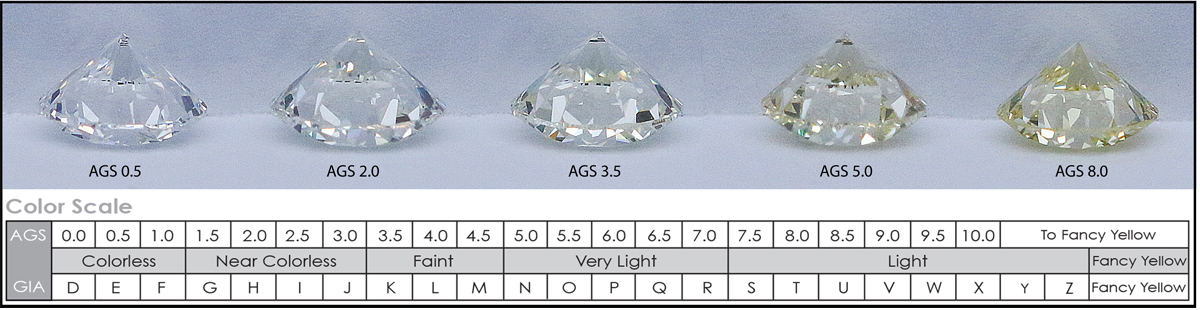

In [1]:
from IPython.display import Image
Image(filename="../Images//Color_Grade.png")

#### Understanding Clarity Classification

The GIA Clarity Scale includes eleven clarity grades ranging from Flawless to I3. Since diamonds form under tremendous heat and pressure, it is extremely rare to find a diamond that lacks any internal and external marks.

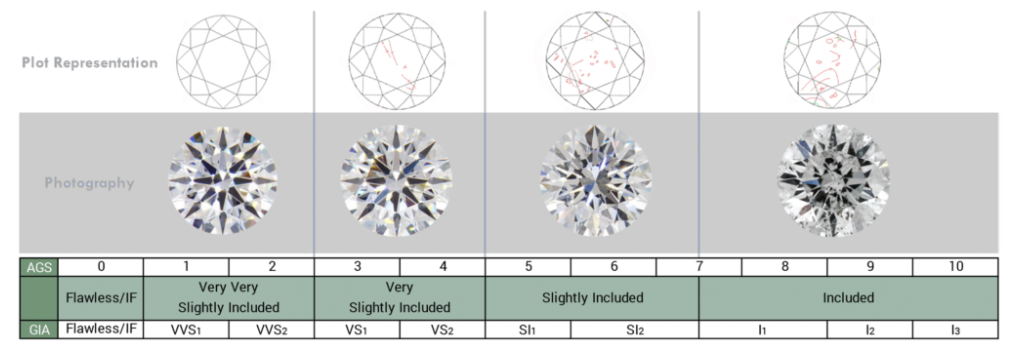

In [2]:
from IPython.display import Image
Image(filename="../Images//Clarity_Chart.png")

#### Understanding Cut Scale

The GIA Cut Scale covers a range from Excellent to Poor. These categories are intricately tied to how the diamond interacts with light, the amount of light that penetrates the diamond, and the manner in which light is reflected back to the viewer.


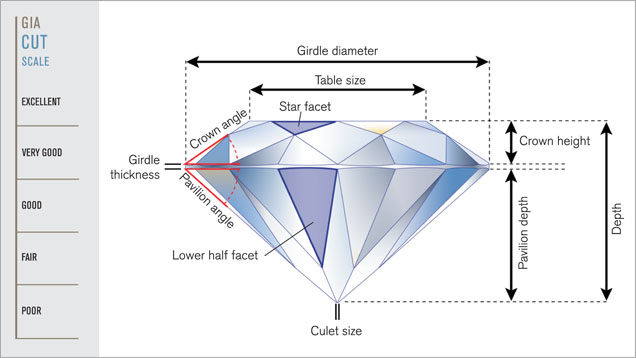

In [3]:
from IPython.display import Image
Image(filename="../Images//Cut_Scale.png")

#### Understanding Carat Weight

One carat equals 200 milligrams in weight. For diamonds under one carat, each carat is divided into 100 points – similar to pennies in a dollar. 0.75 ct. = 75 points, 1/2 ct. = 50 points. 

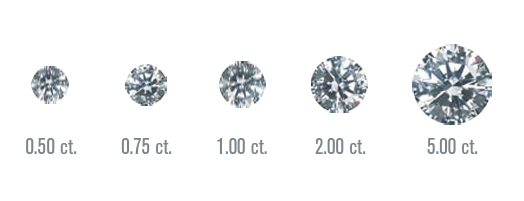

In [4]:
from IPython.display import Image
Image(filename="../Images//Carat_Scale.png")

# Importing Raw Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import requests
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from scipy import stats
import math
from sklearn.metrics import mean_absolute_error

In [6]:
df = pd.read_csv("../Raw_data//diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Cleaning Data

In [7]:
# Drop the first column of the raw file
df = df.drop(columns=['Unnamed: 0'])

# Rename the column x, y, and depth 
df = df.rename(columns={'x': 'length_mm', 'y': 'width_mm', 'z': 'depth_mm','depth': 'depth_p'})
df. head()

,carat,cut,color,clarity,depth_p,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.info() # Check for null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth_p    53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   length_mm  53940 non-null  float64
 8   width_mm   53940 non-null  float64
 9   depth_mm   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
# Check for duplicated rows
duplicated_rows = df.duplicated()

# Count the number of duplicated rows
duplicated_count = duplicated_rows.sum()
print("Number of duplicated rows:", duplicated_count)

Number of duplicated rows: 146


In [10]:
# Eliminate duplicated rows
df = df[~duplicated_rows].reset_index(drop=True)

# Check df after removing duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53794 non-null  float64
 1   cut        53794 non-null  object 
 2   color      53794 non-null  object 
 3   clarity    53794 non-null  object 
 4   depth_p    53794 non-null  float64
 5   table      53794 non-null  float64
 6   price      53794 non-null  int64  
 7   length_mm  53794 non-null  float64
 8   width_mm   53794 non-null  float64
 9   depth_mm   53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [11]:
df.to_csv("Diamonds_Clean_Data.csv", index=False)

# Explorative Data Analysis (EDA)

Let's explore how the data is distributed in terms of categorical attributes such as cut quality, color, and clarity.

## Categorical Variables Analysis

### Diamonds by Cut

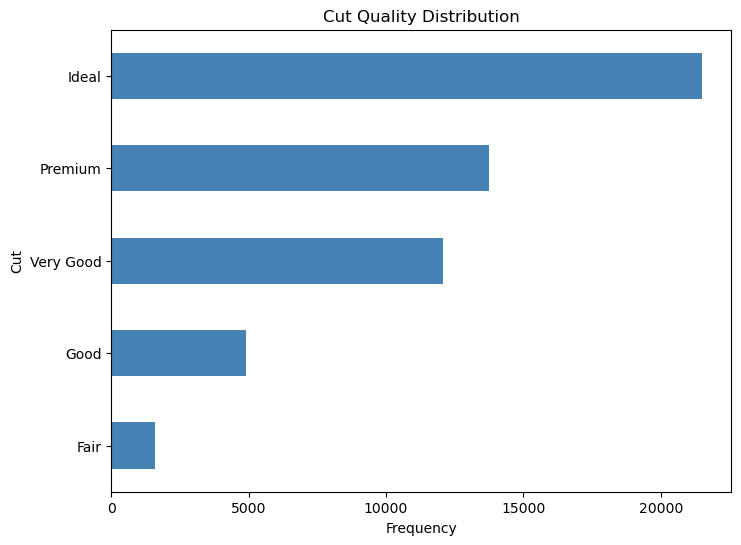

In [12]:
# Plot a horizontal bar chart for the 'cut' column in descending order
plt.figure(figsize=(8, 6))
df['cut'].value_counts().sort_values(ascending=True).plot(kind='barh', color='steelblue')
plt.title('Cut Quality Distribution')
plt.xlabel('Frequency')
plt.ylabel('Cut')
plt.show()

### Diamonds by Color

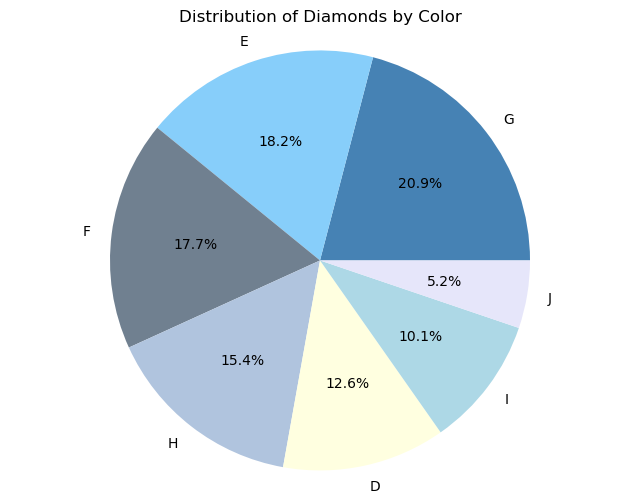

In [13]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the frequency of each color
color_counts = df['color'].value_counts()

# Define a list of valid colors for the pie chart
colors = ['steelblue', 'lightskyblue', 'slategray', 'lightsteelblue', 'lightyellow', 'lightblue', 'lavender']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Diamonds by Color')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

plt.show()



### Diamonds by Clarity

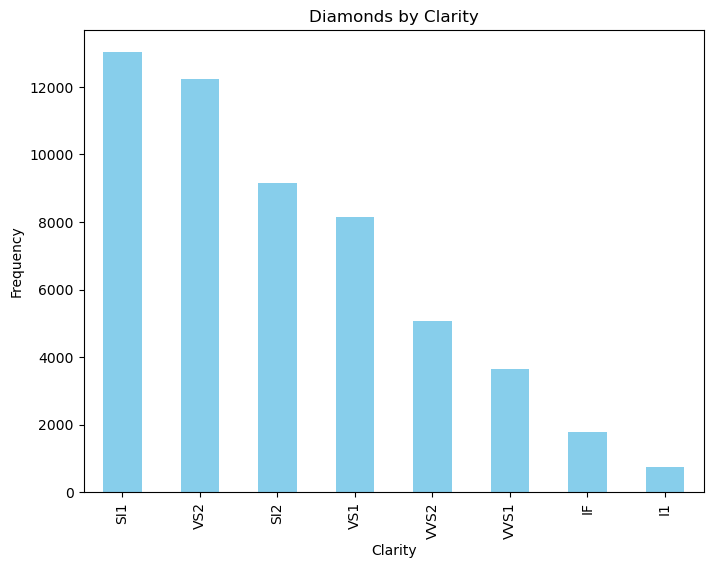

In [14]:
# Plot a histogram for the 'clarity' column
plt.figure(figsize=(8, 6))
df['clarity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Diamonds by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.show()

## Summary Statistics

Now, let's explore some basic summary statistics on the numerical variables based on the 'cut'.

### Summary statistics for the 'price' group by Cut Quality

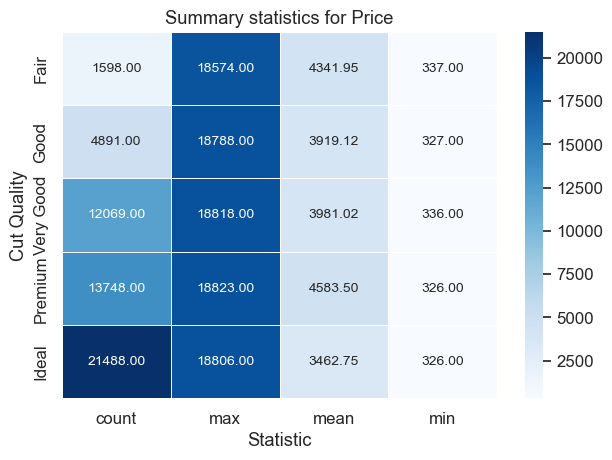

In [15]:
# Group the data by the 'cut' column and calculate summary statistics for the 'price' column

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a df with statistical info on price grouped by cut quality:
price_stats = df['price'].groupby(df['cut']).apply(get_stats).unstack()
price_stats = price_stats.sort_values('count')

# Create a heatmap using Seaborn
sns.set(font_scale=1.1)

# Create a custom function to format the annotations
def format_annotation(value):
    if value == value:  # Check if the value is not NaN
        if 'count' in price_stats.columns and value == price_stats['count'].max():
            return f'{value:.0f}'  # Format 'count' as an integer
        elif 'max' in price_stats.columns and value == price_stats['max'].max():
            return f'{value:.0f}'  # Format 'max' as an integer
        else:
            return f'{value:.2f}'  # Format other columns as floats with 2 decimal places
    else:
        return ''  # Handle NaN values

heatmap = sns.heatmap(data=price_stats[['count', 'max', 'mean', 'min']], annot=True, cmap='Blues', linewidths=0.5, fmt=".2f",
                     annot_kws={'size': 10})

plt.title('Summary statistics for Price')
plt.xlabel('Statistic')
plt.ylabel('Cut Quality')

plt.tight_layout()
plt.show()


### Summary statistics for the 'length' group by Cut Quality

In [16]:
# Group the data by the 'cut' column and calculate summary statistics for the 'lenght' column
summary_stats = df.groupby('cut')['length_mm'].describe()

# Display the summary statistics
print(summary_stats)

             count      mean       std  min   25%   50%     75%    max
cut                                                                   
Fair        1598.0  6.243035  0.961000  0.0  5.63  6.17  6.6975  10.74
Good        4891.0  5.836350  1.050763  0.0  5.02  5.98  6.4200   9.44
Ideal      21488.0  5.509227  1.064310  0.0  4.54  5.25  6.4400   9.65
Premium    13748.0  5.973170  1.187934  0.0  4.80  6.11  6.8000  10.14
Very Good  12069.0  5.740457  1.100336  0.0  4.75  5.74  6.4700  10.01


### Summary statistics for the 'width' group by Cut Quality

In [17]:
# Group the data by the 'cut' column and calculate summary statistics for the 'width' column
summary_stats = df.groupby('cut')['width_mm'].describe()

# Display the summary statistics
print(summary_stats)

             count      mean       std  min   25%   50%     75%    max
cut                                                                   
Fair        1598.0  6.178723  0.952869  0.0  5.57  6.10  6.6375  10.54
Good        4891.0  5.848442  1.045175  0.0  5.02  5.99  6.4300   9.38
Ideal      21488.0  5.521907  1.074637  0.0  4.55  5.26  6.4500  31.80
Premium    13748.0  5.944203  1.259716  0.0  4.79  6.06  6.7600  58.90
Very Good  12069.0  5.769822  1.102446  0.0  4.77  5.77  6.5100   9.94


### Summary statistics for the 'depth' group by Cut Quality

In [18]:
# Group the data by the 'cut' column and calculate summary statistics for the 'depth' column
summary_stats = df.groupby('cut')['depth_mm'].describe()

# Display the summary statistics
print(summary_stats)

             count      mean       std  min   25%   50%   75%    max
cut                                                                 
Fair        1598.0  3.979155  0.649467  0.0  3.61  3.97  4.27   6.98
Good        4891.0  3.638082  0.650757  0.0  3.07  3.69  4.03   5.79
Ideal      21488.0  3.402524  0.657745  0.0  2.80  3.23  3.98   6.03
Premium    13748.0  3.646684  0.731014  0.0  2.94  3.71  4.16   8.06
Very Good  12069.0  3.559613  0.729965  0.0  2.95  3.56  4.02  31.80


## Correlation Analysis

Finally, let's explore some correlations within the dataset. Our ultimate goal is to identify the attributes that influence price, so we will focus on the variables that exhibit a strong correlation with price.

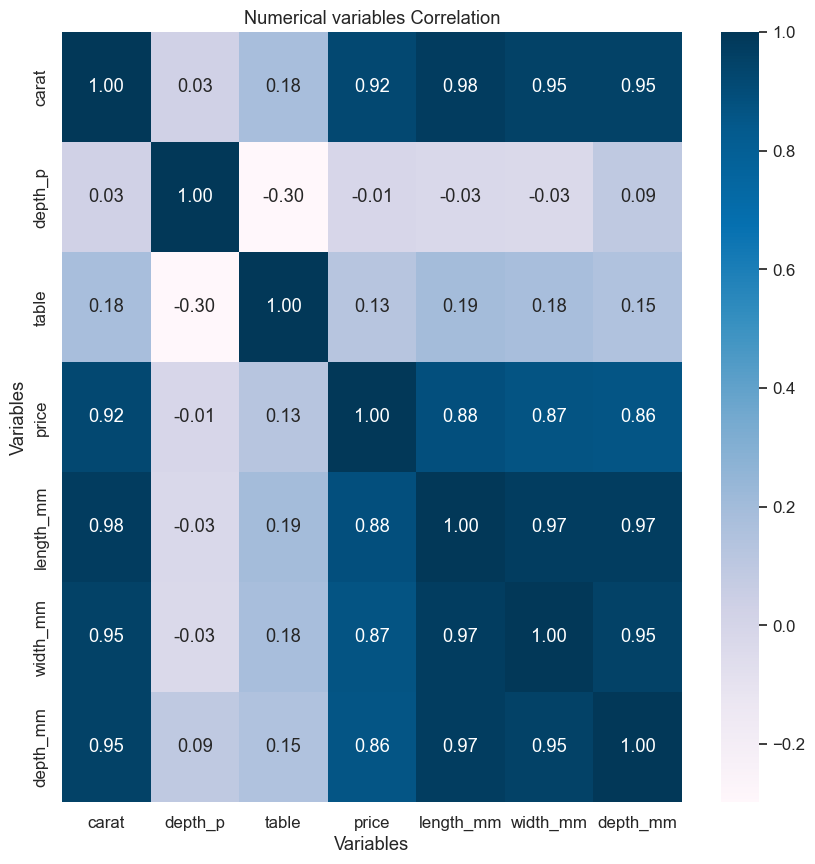

In [19]:
# First, let's check ALL numerical columns
columns_to_include = [

    'carat',
    'depth_p',
    'table',
    'price',
    'length_mm',
    'width_mm',
    'depth_mm',
]

# Calculate the correlations between the selected columns
correlations = df[columns_to_include].corr()

# Create a heatmap of the correlations with values displayed
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='PuBu')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Numerical variables Correlation')
plt.show()


### P-value validation

The attributes carat, depth, width, and length appear to have a strong correlation with price, so let's double check the correlation of only these variables and their p-values:

In [20]:
# Calculate the correlation and p-value for 'carat'
correlation_carat, p_value_carat = pearsonr(df['carat'], df['price'])

# Calculate the correlation and p-value for 'depth_mm'
correlation_depth_mm, p_value_depth_mm = pearsonr(df['depth_mm'], df['price'])

# Calculate the correlation and p-value for 'width_mm'
correlation_width_mm, p_value_width_mm = pearsonr(df['width_mm'], df['price'])

# Calculate the correlation and p-value for 'length_mm'
correlation_length_mm, p_value_length_mm = pearsonr(df['length_mm'], df['price'])

print("Correlation and p-values:")
print(f"'carat' - Correlation: {correlation_carat}, p-value: {p_value_carat}")
print(f"'depth_mm' - Correlation: {correlation_depth_mm}, p-value: {p_value_depth_mm}")
print(f"'width_mm' - Correlation: {correlation_width_mm}, p-value: {p_value_width_mm}")
print(f"'length_mm' - Correlation: {correlation_length_mm}, p-value: {p_value_length_mm}")


Correlation and p-values:
'carat' - Correlation: 0.921548321403012, p-value: 0.0
'depth_mm' - Correlation: 0.8612077326584752, p-value: 0.0
'width_mm' - Correlation: 0.8653952444045168, p-value: 0.0
'length_mm' - Correlation: 0.8845040375175467, p-value: 0.0


### Observations-1

It is observed that the price of a diamond is highly correlated with its carat, depth, width, and length. We initially examined this by assessing the correlations and subsequently confirmed it by examining the p-values.

# Multiple Linear Regression

## Scenario A

We first want to explore the model prediction performance without normalizing the data or removing outliers.

In [21]:
# Relevant attributes for prediction and normalization
predictor_columns = ['carat', 'length_mm', 'width_mm', 'depth_mm']
target_column = 'price'

# Extract the predictor and target variables
X = df[predictor_columns]
y = df[target_column]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53794 non-null  float64
 1   length_mm  53794 non-null  float64
 2   width_mm   53794 non-null  float64
 3   depth_mm   53794 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


### Split the dataset into training and test sets

In [22]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train and y_train will be our training data,
# X_test and y_test will be our test data.

### Model-a

In [23]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

### Model Performance-a

In [24]:
# Make predictions using the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 2347937.4700906817
R-squared (R2) Score: 0.8459567869450619


In [25]:
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate RMSE as a percentage relative to the range of the target variable
target_range = y_test.max() - y_test.min()  # Range of the target variable in the test set
rmse_percentage = (rmse / target_range) * 100

print(f"RMSE: {rmse:.2f}")
print(f"RMSE as a percentage: {rmse_percentage:.2f}%")

RMSE: 1532.30
RMSE as a percentage: 8.30%


## Scenario B

In this scenario, we'll normalize the data by converting all the real-world metrics to p-values to assess whether the model prediction performance improves.

### Data Normalization

In [26]:
# relevant attributes for prediction and normalization
predictor_columns = ['carat', 'length_mm', 'width_mm', 'depth_mm']
target_column = 'price'

# Extract the predictor and target variables
X = df[predictor_columns]
y = df[target_column]

# Normalize the predictor data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Create a new data frame with normalized predictor values
df_normalized = pd.DataFrame(data=X_normalized, columns=predictor_columns)


df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53794 non-null  float64
 1   length_mm  53794 non-null  float64
 2   width_mm   53794 non-null  float64
 3   depth_mm   53794 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


### Outlier Detection

In [27]:
# Check for outliers using the IQR method
Q1 = df_normalized.quantile(0.25)
Q3 = df_normalized.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_normalized < (Q1 - 1.5 * IQR)) | (df_normalized > (Q3 + 1.5 * IQR))).any(axis=1)

# check for outliers:
outlier_indices = df[outliers].index
outlier_count = outliers.sum()

print(f"Indices of outliers: {outlier_indices}")
print(f"Number of outliers: {outlier_count}")


Indices of outliers: Index([ 2201,  2308,  4778,  5457, 10145, 11156, 11935, 12218, 12971, 13087,
       ...
       27672, 27674, 27675, 27677, 27679, 27682, 48268, 49047, 49413, 51361],
      dtype='int64', length=1890)
Number of outliers: 1890


In [28]:
# filter the data frame to get rows without outliers
df_no_outliers = df[~outliers]
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51904 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      51904 non-null  float64
 1   cut        51904 non-null  object 
 2   color      51904 non-null  object 
 3   clarity    51904 non-null  object 
 4   depth_p    51904 non-null  float64
 5   table      51904 non-null  float64
 6   price      51904 non-null  int64  
 7   length_mm  51904 non-null  float64
 8   width_mm   51904 non-null  float64
 9   depth_mm   51904 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.4+ MB


### Split the dataset into training and test sets

We will split 80:20 and using randomstate of 42 to make a repeatable result. 

In [29]:
# Split the data into training and test sets
X = df_no_outliers[predictor_columns]  # Use the predictor variables (carat, lenght, width, and depth)
y = df_no_outliers[target_column]      # Use the target variable (price)

# Set the test_size to control the split ratio (e.g., 0.2 for an 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train will be our training data, 
# X_test and y_test will be our test data.

### Model-b

In [30]:
# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

### Model Performance-b

In [31]:
# Make predictions using the test data
simple_predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, simple_predictions)
r2 = r2_score(y_test, simple_predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1808420.6320063598
R-squared (R2) Score: 0.842114557342192


In [32]:
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate RMSE as a percentage relative to the range of the target variable
target_range = y_test.max() - y_test.min()  # Range of the target variable in the test set
rmse_percentage = (rmse / target_range) * 100

print(f"RMSE: {rmse:.2f}")
print(f"RMSE as a percentage: {rmse_percentage:.2f}%")

RMSE: 1344.78
RMSE as a percentage: 7.28%


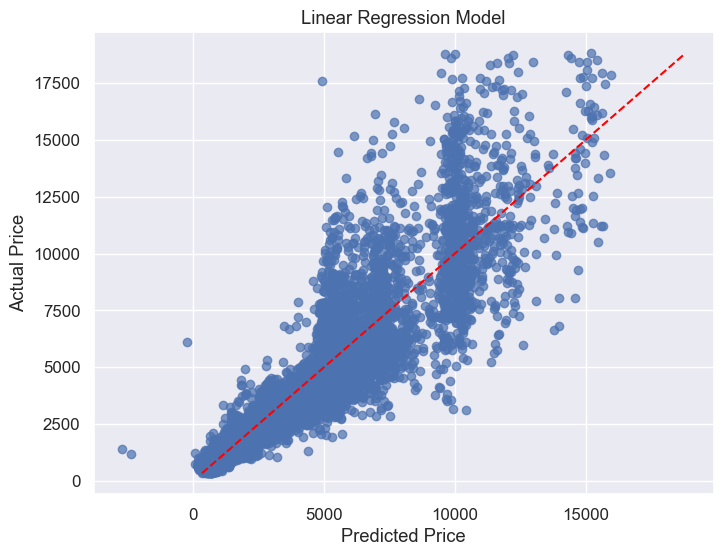

In [33]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(simple_predictions,y_test, alpha=0.7, color='b')
plt.ylabel('Actual Price')
plt.xlabel('Predicted Price')
plt.title('Linear Regression Model')

# Add a 45-degree line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

### Intercept and Coefficients

In [34]:
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (b):", intercept)

Intercept (b): 7248.060633448698


In [35]:
feat=list(X_train.columns)
coef = model.coef_.transpose()
coef_table = np.vstack((feat, coef)).T
df = pd.DataFrame(coef_table, columns=['Feature', 'Coefficients'])
df

,Feature,Coefficients
0,carat,14139.933853990178
1,length_mm,-3690.58627849953
2,width_mm,3051.3944596096158
3,depth_mm,-3072.0296401656033


## Observations-2

Scenario B, with its lower MSE appears to be the preferable option. In summary, these results indicate that your linear regression model is performing reasonably well. It effectively explains a substantial portion of the price variability and generates predictions that closely align with the actual prices.

# Lasso & Ridge Regression

In the context of our multiple regression model, we initially selected four variables as predictive factors. However, we've discovered significant correlations among these variables, indicating multicollinearity. As a result, we are exploring alternative models such as Lasso and Ridge regression techniques to mitigate multicollinearity effects and refine feature selection.

Lasso and Ridge are regularization methods used in machine learning to combat overfitting. Lasso, also known as L1 regularization, incorporates the absolute values of coefficients into the loss function, encouraging sparsity and thus performing feature selection. Meanwhile, Ridge, known as L2 regularization, adds the squared magnitudes of coefficients to the loss function, which helps in controlling large weights and generating smoother models.


In [36]:
df_lasso = df_no_outliers.copy()
# df_lasso.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
df_lasso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51904 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      51904 non-null  float64
 1   cut        51904 non-null  object 
 2   color      51904 non-null  object 
 3   clarity    51904 non-null  object 
 4   depth_p    51904 non-null  float64
 5   table      51904 non-null  float64
 6   price      51904 non-null  int64  
 7   length_mm  51904 non-null  float64
 8   width_mm   51904 non-null  float64
 9   depth_mm   51904 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.4+ MB


In [37]:
## simulating for best alpha value
alphas_ridge = 10**np.linspace(5,-5,20)
alphas_lasso = np.linspace(0.09,0.01,20)

def find_best_alpha_value_lasso_ridge(alphas_ridge,alphas_lasso,X_train,Y_train,X_test, Y_test):

    if(len(alphas_ridge) != len(alphas_lasso)):
        return
    
    
    lasso_model = Lasso()  
    ridge_model = Ridge()


    sim_dict = {
    "alpha_lasso":[],
    "R2_Lasso_test":[],
    "R2_Lasso_train":[],
    "RMSE_Lasso":[],
    "alpha_ridge":[],
    "R2_Ridge_test":[],
    "R2_Ridge_train":[],
    "RMSE_Ridge":[]
    }

    for  i in range(len(alphas_ridge)):
        alpha_current_ridge = alphas_ridge[i]
        alpha_current__lasso = alphas_lasso[i]
        

        lasso_model.set_params(alpha = alpha_current__lasso,max_iter =5000)
        lasso_model.fit(X_train, Y_train)
        lasso_predictions = lasso_model.predict(X_test)
        r2_Lasso_test = lasso_model.score(X_test, Y_test)
        r2_Lasso_train = lasso_model.score(X_train, Y_train)
        rmse_Lasso = math.sqrt(mean_absolute_error(Y_test,lasso_predictions))
    
        sim_dict["alpha_lasso"].append(alpha_current__lasso)
        sim_dict["R2_Lasso_test"].append(r2_Lasso_test)
        sim_dict["R2_Lasso_train"].append(r2_Lasso_train)
        sim_dict["RMSE_Lasso"].append(rmse_Lasso)
    
        # Ridge_test
        ridge_model.set_params(alpha = alpha_current_ridge,max_iter =5000)
        ridge_model.fit(X_train, Y_train)
        ridge_predictions = ridge_model.predict(X_test)
        r2_ridge_test = ridge_model.score(X_test, Y_test)
        r2_ridge_train = ridge_model.score(X_train, Y_train)
        rmse_ridge = math.sqrt(mean_absolute_error(Y_test,ridge_predictions))
    
        sim_dict["alpha_ridge"].append(alpha_current_ridge)
        sim_dict["R2_Ridge_test"].append(r2_ridge_test)
        sim_dict["R2_Ridge_train"].append(r2_ridge_train)
        sim_dict["RMSE_Ridge"].append(rmse_ridge)
        
        
    return sim_dict



In [38]:
df_lasso_tranfromed=pd.get_dummies(df_lasso, drop_first=True,dtype=int)

In [39]:
# Extract input features and target variables
X = df_lasso_tranfromed.drop(["price"],axis=1)
y = df_lasso_tranfromed['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sim_dict = find_best_alpha_value_lasso_ridge(alphas_ridge,alphas_lasso,X_train,y_train,X_test, y_test)
simulated_alphas_df = pd.DataFrame(sim_dict) 

simulated_alphas_df


,alpha_lasso,R2_Lasso_test,R2_Lasso_train,RMSE_Lasso,alpha_ridge,R2_Ridge_test,R2_Ridge_train,RMSE_Ridge
0,0.090000,0.917466,0.913918,25.571286,100000.000000,0.599576,0.592166,38.121033
1,0.085789,0.917468,0.913918,25.571565,29763.514416,0.749007,0.742503,32.645089
2,0.081579,0.917470,0.913919,25.571846,8858.667904,0.800576,0.796216,31.993331
3,0.077368,0.917472,0.913919,25.572128,2636.650899,0.829383,0.826636,31.322553
4,0.073158,0.917474,0.913920,25.572411,784.759970,0.855357,0.853385,30.053857
5,0.068947,0.917476,0.913920,25.572695,233.572147,0.885506,0.883349,28.061972
6,0.064737,0.917479,0.913920,25.572980,69.519280,0.907909,0.905136,26.307336
7,0.060526,0.917481,0.913921,25.573264,20.691381,0.915708,0.912472,25.698765
8,0.056316,0.917483,0.913921,25.573549,6.158482,0.917217,0.913756,25.588896
9,0.052105,0.917485,0.913921,25.573839,1.832981,0.917452,0.913907,25.577210


In [40]:
best_alpha_lasso = simulated_alphas_df.loc[simulated_alphas_df.R2_Lasso_test == simulated_alphas_df.R2_Lasso_test.max()].alpha_lasso.values[0]
best_alpha_ridge = simulated_alphas_df.loc[simulated_alphas_df.R2_Ridge_test == simulated_alphas_df.R2_Ridge_test.max()].alpha_ridge.values[0]

In [41]:
# Create and train the Lasso regression model
lasso_model = Lasso(alpha=best_alpha_lasso,max_iter=40000)  # alpha parameter for regularization
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.01, max_iter=40000)

In [42]:
# Get the coefficients assigned to each feature
lasso_coefficients = lasso_model.coef_

# Create a DataFrame to associate the coefficients with the feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})

# Filter out the features with non-zero coefficients (selected features)
selected_features = coefficients_df[coefficients_df['Coefficient'] != 0]

# Sort the selected features by their coefficients
selected_features = selected_features.sort_values(by='Coefficient', ascending=False)

print("Selected Features:")
print(selected_features)

Selected Features:
          Feature   Coefficient
0           carat  14002.081314
16     clarity_IF   4271.800905
21   clarity_VVS1   3928.133901
22   clarity_VVS2   3872.225956
19    clarity_VS1   3519.014378
20    clarity_VS2   3202.662273
17    clarity_SI1   2617.190482
18    clarity_SI2   1690.627942
4        width_mm   1041.719843
7       cut_Ideal    611.532857
8     cut_Premium    579.809390
9   cut_Very Good    481.977980
6        cut_Good    367.450214
1         depth_p      8.961993
2           table    -37.750102
10        color_E   -215.649669
11        color_F   -289.448941
12        color_G   -502.547051
13        color_H  -1018.334736
14        color_I  -1537.350950
3       length_mm  -1864.757723
5        depth_mm  -2040.684645
15        color_J  -2278.357201


In [43]:
# Use the trained Lasso model to make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the model's performance

mse = mean_squared_error(y_test, lasso_predictions)**0.5
r2_lasso = r2_score(y_test, lasso_predictions)

print("Model Performance on Test Set:")
print(f"Root Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2_lasso}")

Model Performance on Test Set:
Root Mean Squared Error: 972.0668448246491
R-squared (R2) Score: 0.9175036190384319


In [48]:
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)


In [45]:
mse = mean_squared_error(y_test, ridge_predictions)**0.5
r2_ridge = r2_score(y_test, ridge_predictions)

print("Model Performance on Test Set:")
print(f"Root Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2_ridge}")

Model Performance on Test Set:
Root Mean Squared Error: 972.0428511926381
R-squared (R2) Score: 0.9175076915225184


### Plot of all three Models

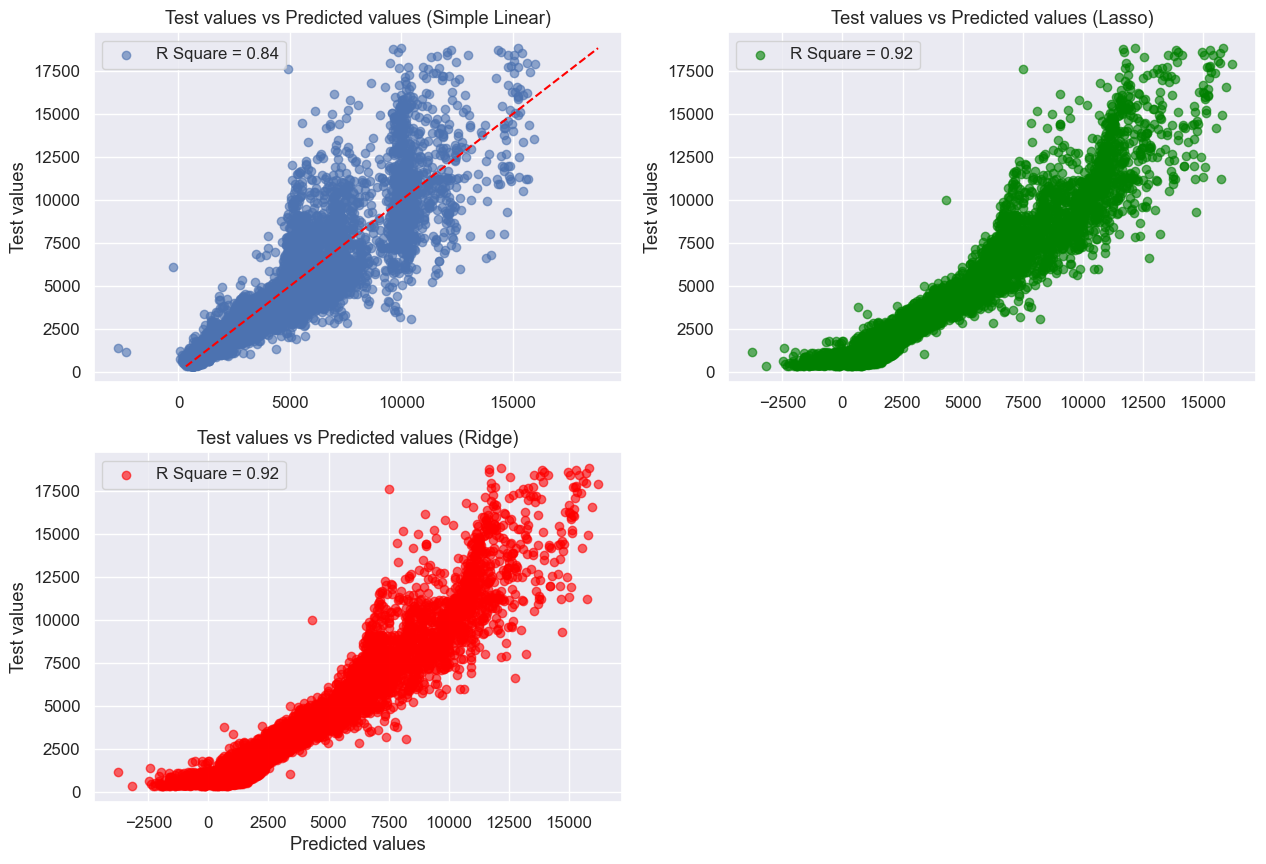

In [47]:
fig = plt.figure(figsize=(15,10))

simple_linear = fig.add_subplot(2,2,1)
lasso_linear = fig.add_subplot(2,2,2)
ridge_linear = fig.add_subplot(2,2,3)

simple_linear.scatter(simple_predictions,y_test,alpha=0.6,label='R Square = %0.2f' % r2)
simple_linear.set_title("Test values vs Predicted values (Simple Linear)")
simple_linear.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red', linestyle='--')
simple_linear.set_ylabel("Test values")
simple_linear.legend(loc="upper left")


lasso_linear.scatter(lasso_predictions,y_test,alpha=0.6,color = "green",label='R Square = %0.2f' % r2_lasso)
lasso_linear.set_title("Test values vs Predicted values (Lasso)")
lasso_linear.set_ylabel("Test values")
lasso_linear.legend(loc="upper left")


ridge_linear.scatter(ridge_predictions,y_test,alpha=0.6,color = "red",label='R Square = %0.2f' % r2_ridge)
ridge_linear.set_title("Test values vs Predicted values (Ridge)")
ridge_linear.set_ylabel("Test values")
ridge_linear.set_xlabel("Predicted values")
ridge_linear.legend(loc="upper left")

plt.show()

## Observations-3

Following the execution of the Simple Linear Regression, Lasso and Ridge model, the findings suggest that all four variables, namely carat, width, depth, and length, can indeed be retained for use. However feature selection would be better using Lasso and Ridge models instead to prevent bias effects. The Lasso and Ridge models have the tendency to look at all features and rank them according to their importance. 

Notably, the models tested have good perfomance score.

# Decision Tree

In our initial approach, we utilized multiple linear regression, as well as Lasso and Ridge regressions, to forecast prices. We achieved predictive model accuracies of 0.84 and 0.91 respectively. Presently, our objective is to develop a classification model integrating all categorical data—such as 'cut,' 'color,' and 'clarity'—to predict price ranges categorized as 'Very Low,' 'Low,' 'Moderate,' 'High,' or 'Very High.'

To accomplish this, we're adopting the DecisionTreeClassifier, tailored to handle both numerical and categorical data seamlessly. Noteworthy, when employing scikit-learn's decision tree models, encoding the target variable ('price_category' in our context) is not mandatory if it's categorical, thereby allowing us to bypass this step in our implementation.

In [178]:
df_class = df_no_outliers.copy()
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51904 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      51904 non-null  float64
 1   cut        51904 non-null  object 
 2   color      51904 non-null  object 
 3   clarity    51904 non-null  object 
 4   depth_p    51904 non-null  float64
 5   table      51904 non-null  float64
 6   price      51904 non-null  int64  
 7   length_mm  51904 non-null  float64
 8   width_mm   51904 non-null  float64
 9   depth_mm   51904 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.4+ MB


In [179]:
summary_statistics = df_class['price'].describe()
# Print the summary statistics
print(summary_statistics)

count    51904.000000
mean      3534.578356
std       3415.866962
min        326.000000
25%        928.000000
50%       2290.000000
75%       4959.000000
max      18818.000000
Name: price, dtype: float64


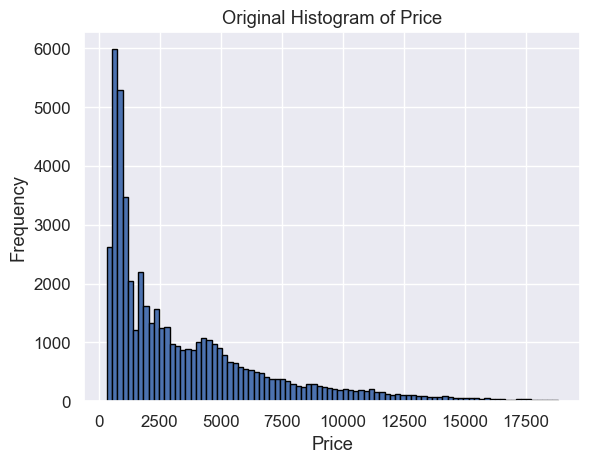

In [180]:
data = df_class['price']
# Plot the histogram with automatically calculated number of bins
plt.hist(data, bins='auto', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Original Histogram of Price')
plt.show()

### Number of bins and bin width

When determining the number of classes using the Freedman–Diaconis rule, the result suggests using 3 bins. However, upon examining the dataset, it becomes apparent that the most of values would be grouped into a single bin. This concentration may impact the accuracy of the classification model. Therefore, we have decided to deliberately set the number of bins to 5, aiming to distribute the dataset more evenly.

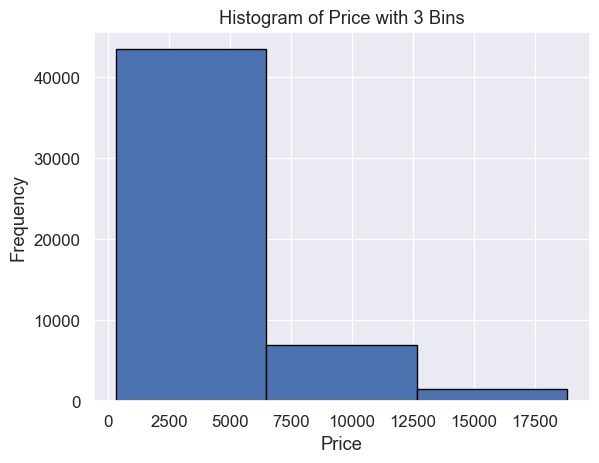

Optimal number of bins: 3
Optimal bin width: 6164.0


In [181]:
# Calculate the optimal number of bins and bin width using Freedman–Diaconis rule
num_bins = int(np.ceil((df_class['price'].max() - df_class['price'].min()) / (2 * np.percentile(df_class['price'], 75) - np.percentile(df_class['price'], 25))))
bin_width = (df_class['price'].max() - df_class['price'].min()) / num_bins

# Plot the histogram with the specified number of bins
plt.hist(data, bins=num_bins, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'Histogram of Price with {num_bins} Bins')
plt.show()

print("Optimal number of bins:", num_bins)
print("Optimal bin width:", bin_width)

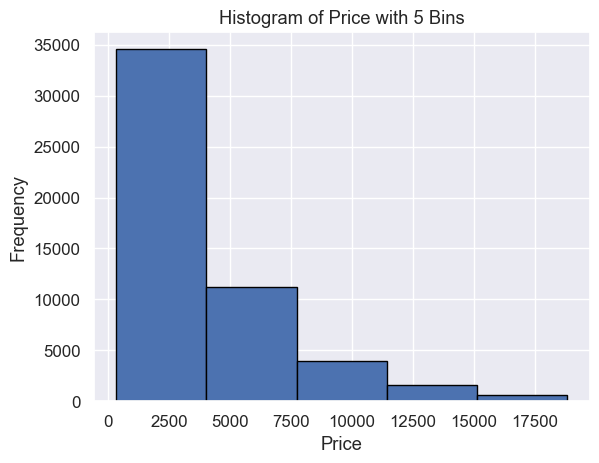

Specified number of bins: 5
Calculated bin width: 3698.4


In [182]:
data = df_class['price']

# Specify the desired number of bins
desired_num_bins = 5

# Calculate the bin width based on the desired number of bins
d_bin_width = (data.max() - data.min()) / desired_num_bins

# Calculate the optimal number of bins based on the calculated bin width
#num_bins = int((data.max() - data.min()) / d_bin_width)

# Plot the histogram with the specified number of bins
plt.hist(data, bins=desired_num_bins, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'Histogram of Price with {desired_num_bins} Bins')
plt.show()

print(f'Specified number of bins: {desired_num_bins}')
print(f'Calculated bin width: {d_bin_width}')

## Price Categories

In [183]:
# Calculate bin width based on the desired number of bins
d_bin_width = (df_class['price'].max() - df_class['price'].min()) / desired_num_bins

# Calculate bin edges
bin_edges = [0] + [df_class['price'].min() + i * d_bin_width for i in range(1, desired_num_bins)] + [float('inf')]

# Define labels for the bins
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Cut the 'price' column into the specified bins
df_class['price_category'] = pd.cut(df_class['price'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the new 'price_category' column
print(f"{'Price_category':<15}+ {'Price Range':<20}")
print("-" * 35)
for label, edge in zip(bin_labels, bin_edges[:-1]):
    print(f"{label:<15}+ {edge:.1f}-{edge + d_bin_width:.1f}")

Price_category + Price Range         
-----------------------------------
Very Low       + 0.0-3698.4
Low            + 4024.4-7722.8
Medium         + 7722.8-11421.2
High           + 11421.2-15119.6
Very High      + 15119.6-18818.0


In [184]:
#df_class.info()
df_class.head()

,carat,cut,color,clarity,depth_p,table,price,length_mm,width_mm,depth_mm,price_category
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Very Low


## Model-c

In [185]:
# Extract features and target variable
X = df_class[['carat', 'cut', 'color', 'clarity', 'length_mm', 'width_mm', 'depth_mm']]
y = df_class['price_category'] #taget variable

# Encode categorical variables 
label_encoder = LabelEncoder()
X.loc[:, 'cut'] = label_encoder.fit_transform(X['cut'])
X.loc[:, 'color'] = label_encoder.fit_transform(X['color'])
X.loc[:, 'clarity'] = label_encoder.fit_transform(X['clarity'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Display additional metrics
print(classification_report(y_test, predictions))

Accuracy: 0.92
              precision    recall  f1-score   support

        High       0.68      0.70      0.69       295
         Low       0.87      0.86      0.87      2242
      Medium       0.78      0.78      0.78       816
   Very High       0.70      0.67      0.69       109
    Very Low       0.97      0.97      0.97      6919

    accuracy                           0.92     10381
   macro avg       0.80      0.80      0.80     10381
weighted avg       0.92      0.92      0.92     10381



## Observations-4

The decision tree model achieved an overall accuracy of 92%, indicating its ability to correctly predict the 'price_category' for the majority of instances in the test set. Notably, the model excels in predicting 'Very Low' price categories with a precision and recall of 97%, demonstrating high accuracy for this class. The model also performs well for 'Low' and 'Medium' categories, with precision and recall values around 87% and 78%, respectively. However, it shows comparatively lower performance for 'High' and 'Very High' categories, with precision and recall values ranging from 68% to 70%. In summary, while the model demonstrates strong overall accuracy, further optimization may be considered, especially for predicting higher price categories.